In [6]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")
import numpy as np
from src.preprocessing import complete_preprocessing
from sklearn.linear_model import LinearRegression

GOAL: Plot 2D relation between salary_in_usd and gdp_employee_location using the results of the multiple regression 

Regression withouth normalization: Somehow the intercept is off (intercept = -9031311.07759605)

-9031311.077593809


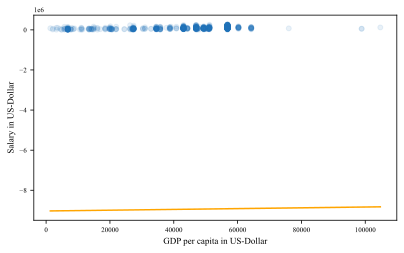

In [7]:
#Plot linear regression of highest correlated attribute
salaries = complete_preprocessing()
#Calculate regression coefficients
X = salaries[["ai_or_ml_job", "experience_level","work_year","company_size", "same_country","remote_ratio","gdp_employee_residence"]]
y = salaries["salary_in_usd"]
X = X.to_numpy()
y = y.to_numpy()

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,7), y)
r2_score = reg.score(X.reshape(-1,7), y)
x_gdp = np.linspace(X[:,6].min(), X[:,6].max(), 1000)
y_pred = reg.coef_[6] * x_gdp + reg.intercept_

print(reg.intercept_)

plt.plot(x_gdp, y_pred, color="orange")
plt.scatter(X[:,6],y, alpha=0.1, s=25)
plt.xlabel("GDP per capita in US-Dollar")
plt.ylabel("Salary in US-Dollar")
plt.show()

Unfortunately we didnt find out why this is happening...
because of this we tried it with normalizing before regression. This way we had problems about "unnormalizing again in order to plot .. in both cases we seem to be missing some vital math part..

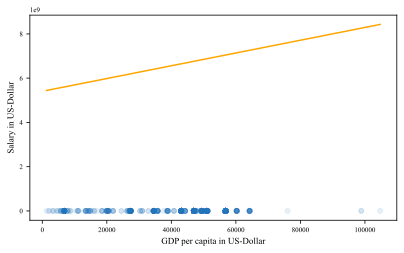

In [8]:
#Plot linear regression of highest correlated attribute
salaries = complete_preprocessing()
gdp_mean = salaries["gdp_employee_residence"].mean()
gdp_std = salaries["gdp_employee_residence"].std()
sal_mean = salaries["salary_in_usd"].mean()
sal_std = salaries["salary_in_usd"].std()
#Calculate regression coefficients
salaries = salaries[["ai_or_ml_job","salary_in_usd", "experience_level","work_year","company_size", "same_country","remote_ratio","gdp_employee_residence"]]

X = salaries[["ai_or_ml_job", "experience_level","work_year","company_size", "same_country","remote_ratio","gdp_employee_residence"]]
y = salaries["salary_in_usd"]

X_norm = ((X - X.mean()) / X.std()).to_numpy()
y_norm = ((y - y.mean()) / y.std()).to_numpy()

reg = LinearRegression(fit_intercept=True).fit(X_norm.reshape(-1,7), y)
r2_score = reg.score(X_norm.reshape(-1,7), y)
x_gdp = np.linspace(X_norm[:,6].min(), X_norm[:,6].max(), 1000)
x_gdp_denorm = x_gdp * gdp_std  + gdp_mean
y_pred = (reg.coef_[6] * x_gdp_denorm + (reg.intercept_* sal_std + sal_mean)) 

plt.plot(x_gdp_denorm, y_pred, color="orange")
plt.scatter(X["gdp_employee_residence"],y, alpha=0.1, s=25)
plt.xlabel("GDP per capita in US-Dollar")
plt.ylabel("Salary in US-Dollar")
plt.show()

If we however only do a regression of one attribute and then plot this, we end up with a nice plot and sensible curve. This is not valid to use in the paper though because gdp is just one out of several predictors which, due to minor correlation between the predictors, will result in slightly different slope of the gdp-dimension compared to the plot below.. 



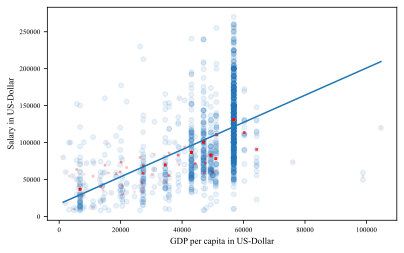

In [10]:
salaries = complete_preprocessing()
#salaries = salaries[salaries["employee_residence_iso_a3"] != "USA"]

salaries["avg_salary"] = salaries.groupby("employee_residence_iso_a3")["salary_in_usd"].transform('mean')
salaries["var_salary"] = salaries.groupby("employee_residence_iso_a3")["salary_in_usd"].transform('std')


y_avg = salaries["avg_salary"].to_numpy()
#y_var = salaries["var_salary"].to_numpy()
y = salaries["salary_in_usd"].to_numpy()
X = salaries["gdp_employee_residence"].to_numpy()

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,1), y)
x_ = np.linspace(X.min(), X.max(), 1000)
y_pred_sklearn = reg.predict(x_.reshape(-1,1))

from tueplots import bundles

plt.rcParams.update(bundles.neurips2021(usetex=False, family='serif'))

plt.plot(x_, y_pred_sklearn)
plt.scatter(X,y, alpha=0.1, s=25)
plt.scatter(X,y_avg, alpha=0.05 , color="red", marker=",", s=3)
#plt.errorbar(X, y_avg, yerr=y_var, fmt='.k')
plt.xlabel("GDP per capita in US-Dollar")
plt.ylabel("Salary in US-Dollar")

plt.savefig('../doc/fig/regression_gdp.pdf', bbox_inches='tight')